<a href="https://colab.research.google.com/github/Ivan1steer/ML_lab/blob/main/ML_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('C:\\Users\\Ivan\\Desktop\\ObesityDataSet_raw_and_data_sinthetic.csv')
dataset.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
dataset["Gender"]=[0 if i == "Male" else 1 for i in dataset["Gender"]]
dataset.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,1,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,1,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,0,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,0,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,0,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
dataset.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
dataset[["CALC", "FAVC", "SCC", "SMOKE","family_history_with_overweight", "CAEC", "MTRANS"]] = ordinal_encoder.fit_transform(dataset[["CALC", "FAVC", "SCC", "SMOKE","family_history_with_overweight", "CAEC", "MTRANS"]])
dataset.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,1,1.62,64.0,3.0,0.0,2.0,3.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0,3.0,Normal_Weight
1,21.0,1,1.52,56.0,2.0,0.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0,Normal_Weight
2,23.0,0,1.80,77.0,1.0,0.0,2.0,3.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,3.0,Normal_Weight
3,27.0,0,1.80,87.0,1.0,0.0,3.0,3.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,4.0,Overweight_Level_I
4,22.0,0,1.78,89.8,2.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,Overweight_Level_II


In [ ]:
vals = dataset["NObeyesdad"].unique()
vals

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [ ]:
print(dataset["NObeyesdad"].value_counts())

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [ ]:
# сохраняем только числовые столбцы. Категориальные кодируем в числовые. Целевую переменную (если она есть) - убираем
cols_for_clusters = ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS']
df= dataset[cols_for_clusters].copy() # делаем копию, чтобы не было сюрпризов с исходным набором данных

In [ ]:
X = df
y = dataset["NObeyesdad"].replace(vals, [0, 1, 2, 3, 4, 5, 6])
yvals = dataset["NObeyesdad"]

C:\Users\Ivan\AppData\Local\Temp\ipykernel_5288\647298372.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = dataset["NObeyesdad"].replace(vals, [0, 1, 2, 3, 4, 5, 6])


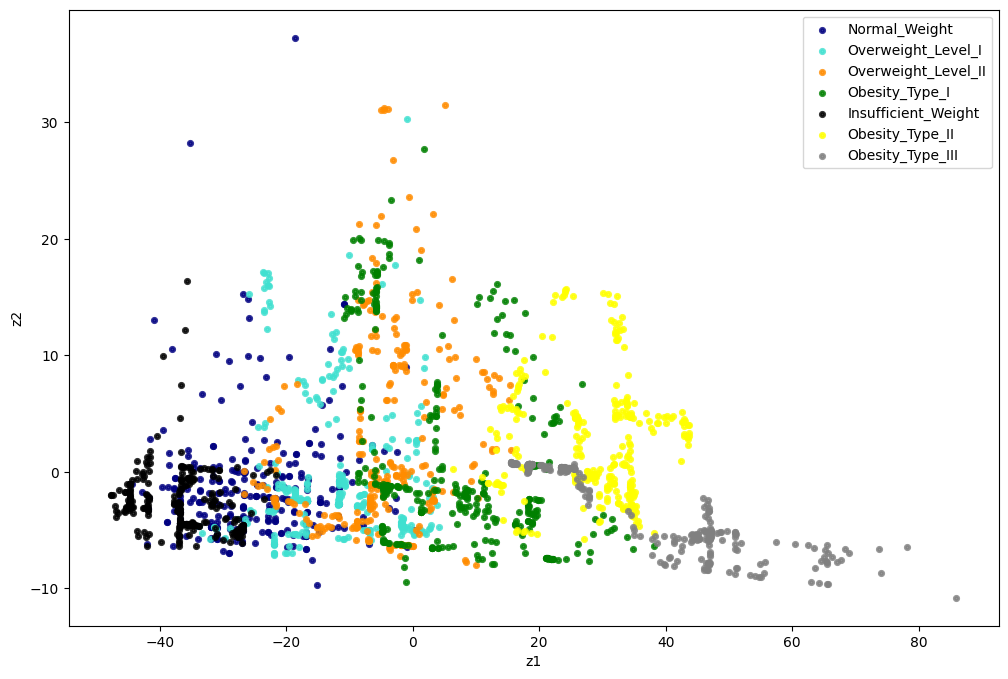

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)


plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", "green", "black", "yellow", "grey"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i],  s=10
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.94063899, 0.05359519])

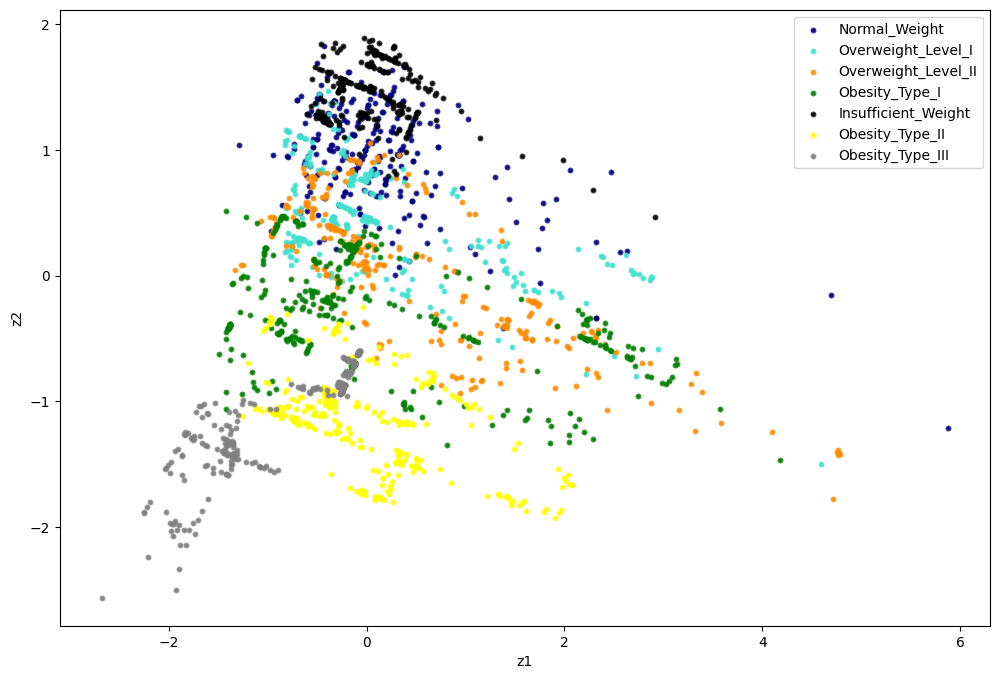

In [ ]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", "green", "black", "yellow", "grey"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i], s = 5
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

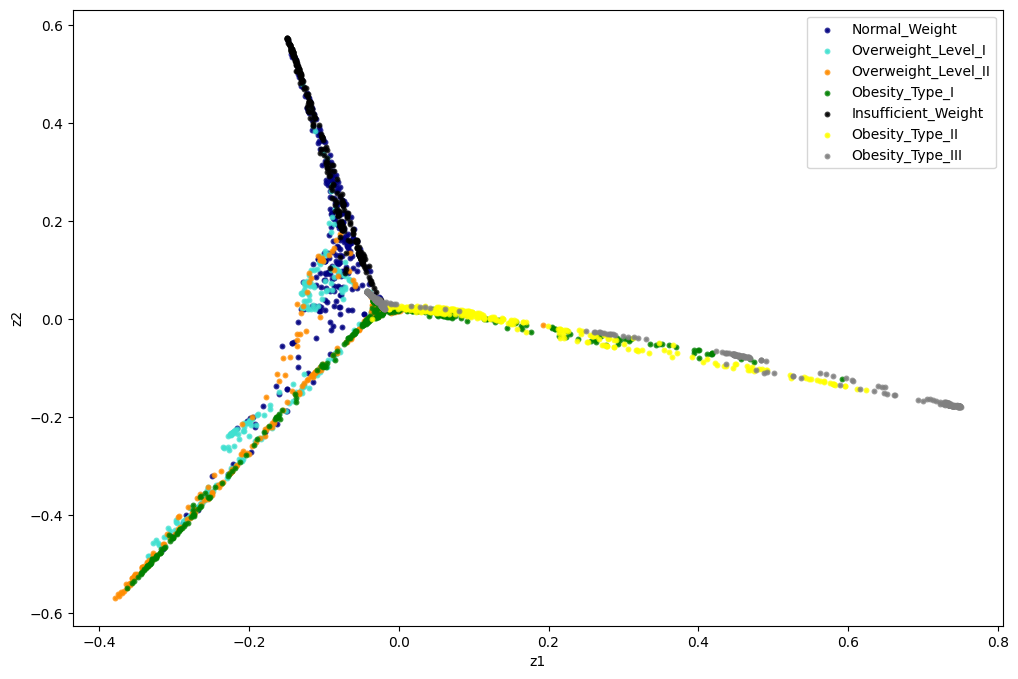

In [ ]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", "green", "black", "yellow", "grey"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i], s = 5
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (2111, 16)
New Shape of X:  (2111, 2)
Kullback-Leibler divergence after optimization:  0.3959977626800537
No. of iterations:  999


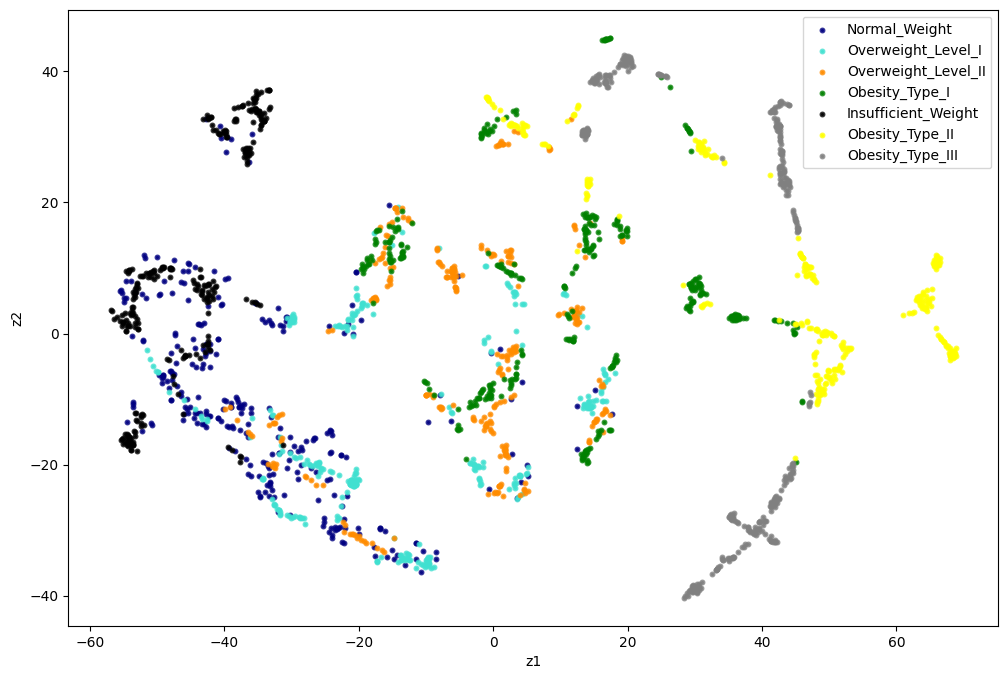

In [ ]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", "green", "black", "yellow", "grey"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i], s=5
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
dbscan_cluster1 = DBSCAN(eps = 1.1, min_samples = 3)
X_new = dbscan_cluster1.fit(X)

In [ ]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 125
Estimated no. of noise points: 1015
v_measure = 0.44280884899896705


['Age' 'Gender' 'Height' 'Weight' 'CALC' 'FAVC' 'FCVC' 'NCP' 'SCC' 'SMOKE'
 'CH2O' 'family_history_with_overweight' 'FAF' 'TUE' 'CAEC' 'MTRANS'
 'NObeyesdad']


C:\Users\Ivan\AppData\Local\Temp\ipykernel_5288\1610064665.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best", shadow=False, scatterpoints=2)


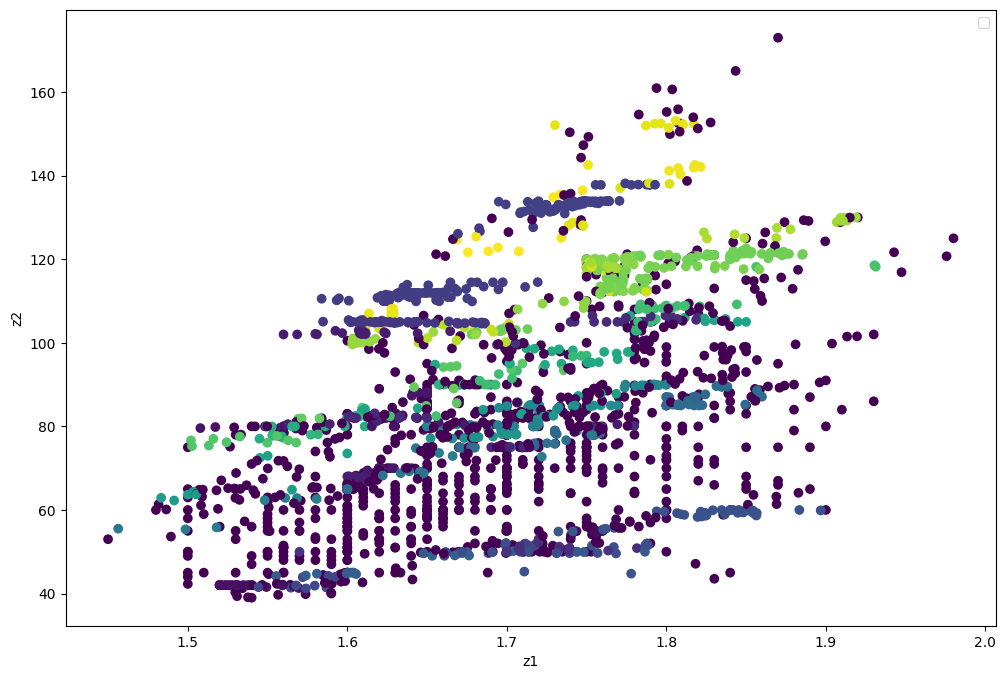

In [ ]:
cols = dataset.columns.to_numpy()
print(cols)
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

plt.scatter(
        X[cols[2]], X[cols[3]],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors

min_samples = 3

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [ ]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

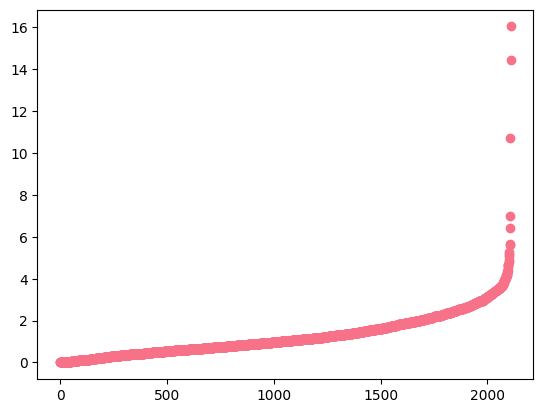

In [ ]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

In [ ]:
dbscan = DBSCAN(eps = 2.5, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=2.5, min_samples=3)


In [ ]:
pred = dbscan.fit_predict(X)

In [ ]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 35
Estimated no. of noise points: 235
v_measure = 0.4347101245531405


In [ ]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

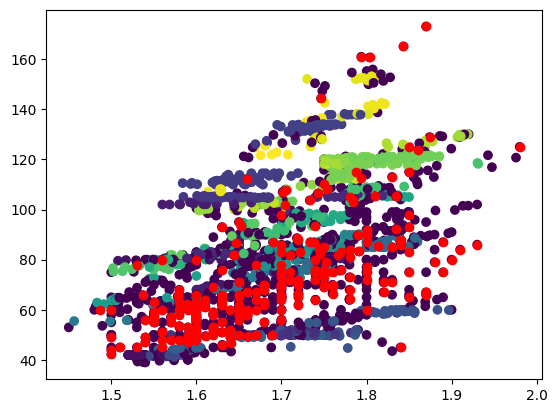

In [ ]:
plt.scatter( X[cols[2]], X[cols[3]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols[2]], values[cols[3]], color='r')
plt.show()